NOTE: CoLab usually autosaves your work, but just to be safe, make sure to save it manually too!


***Double click*** and enter your name here!

Name: Qianwen Luo

# Lab 9: Rock, Paper, Scissors Battle Royale
> "Smash! Test! Beat the Best! Fight for your life, you've been summoned now."

> —Muse: Blockades (2018)

NOTE: This lab contains a lot of reading (sorry). Please read as thoroughly as possible to get an understanding of how the game works. I promise it'll be fun once we play in class!

This week's lab is going to be a little different! Ever seen a cock fight? Of course not, they're illegal in all 50 states. In order to circumvent this unreasonable inhibition on your freedom, you have decided to harness your agent-based modeling skills to satisfy your bloodlust digitally.

**Game Description**

In the biz, we call this an adversarial multi-agent game.

*Initialization*

* A bunch of agents of differing types will be randomly placed on a grid. We'll call these types "species," and we'll call the individual agents "creatures."
* The game starts out with 20 of each species.

*Update Rules*

* The creatures will move around (one space per turn); each species has different rules for how it moves.
* If a creature tries to move into a space that's already occupied by another creature, the two creatures must fight to the death!
* In this case, the "fighting" is actually just a game of rock, paper, scissors. Each creature gets a throw, and the creature with the losing throw dies.
* When fighting, creatures can only see the "appearance" (shape/face and color) of their opponent. Based on this information, each species has a different strategy regarding which throw to make.
* Agents update asynchronously. This means that only one agent is updated per timestep.

**Expectations**

Your job will be to design your very own prize-fighting species of creatures. This will involve you setting the species' rules for appearance, moving, and fighting.

**Tournament**

In class, we'll pit your different species against eachother in a deadly tournament. In each round, your species will compete against four species designed by other students. At the end of each round, the surviving species with the most kills will advance.

In [1]:
# Remember to import the packages that we need

import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

**Naming Conventions**

Note that we are using the following conventions for *throws*:
* Throw "rock:" ```return 'R'```
* Throw "paper:" ```return 'P'```
* Throw "scissors:" ```return 'S'```

_____

The following conventions for *movement*:

The agent's Moore neighborhood is represented by

0 — 1 — 2

3 — 4 — 5

6 — 7 — 8

* Move northwest: ```return 0```
* Move north: ```return 1```
* Move northeast: ```return 2```
* Move west: ```return 3```
* Remain stationary: ```return 4```
* Move east: ```return 5```
* Move southwest: ```return 6```
* Move south: ```return 7```
* Move southeast: ```return 8```

____

And the following convention for *appearance*:

```return``` a list with a shape/face (a letter or character), and a color like so: ```['E', 'green']```

### Problem 1: Meet the Flintstones (8 points)

We have three default species. The first one is called "stone." Stones are the simplest species. They remain stationary and always throw "rock" in a fight. They look like a grey-colored ```O```.

The Stone species is defined in the class below, which has been written for you. Take a look through it to ensure that it makes sense, then go ahead and run the codeblock.

In [2]:
#Stones don't move, look like gray O's, and throw Rock
class Stone:

  def __init__(self, index):
    self.index = index

  def move(self, myPos, neighbors):
    return 4 # According to the naming conventions (above), 4 means don't move

  def appearance(self):
    return ['O','gray']

  def fight(self, opp_face, opp_color):
    return 'R' # This species' strategy is to always throw "rock" in a fight

  # This function (not utilized here) allows the species to record the outcome of previous battles.
  # This is possibly useful if you wanted your agent to switch its strategy based on "learning"
  def record_outcome(self, opp_face, opp_color, you_threw, opp_threw, win_loss_tie):
    return

The second default species is called "crab." Crabs always move to the right, and always throw scissors. They look like a red ```X```.

**1.A** (4 points) Using the naming conventions, and the Stone class as a guide, complete the Crab class.

In [3]:
#Crabs move right, look like red X's, and throw Scissors
class Crab:

  def __init__(self, index):
    self.index = index

  def move(self, myPos, neighbors):
    return 5 # <-- crabs move to the right (East)!

  def appearance(self):
    return ['X', 'red'] # <-- Crabs look like an 'X' and are 'red'

  def fight(self, opp_face, opp_color):
    return 'S' # <-- In a fight, crabs always throw scissors

  # This function (not utilized here) allows the species to record the outcome of previous battles.
  # This is possibly useful if you wanted your agent to switch its strategy based on "learning"
  def record_outcome(self, opp_face, opp_color, you_threw, opp_threw, win_loss_tie):
    return

The third default species is called "bird." Birds move up and to the right in sequence. When they're moving up, they look like ```^```, and when they're moving to the right, they look like ```v```. They're colored white and they always throw paper.

**1.B** (4 points) Based on this behavior, complete the bird class.

In [4]:
#Birds alternate moving up and right, look like white Y's, and throw Paper
class Bird:

  def __init__(self, index):
    self.index = index
    self.lastMove = np.random.choice([1,5]) # Initialize lastMove randomly
    if self.lastMove == 1: # Initialize the face based on the randomly-generated last move
      self.face = '^'
    else:
      self.face = 'v'

  def move(self, myPos, neighbors):
    if self.lastMove == 1: # If the last move was up, go right
      self.lastMove = 5 # Update the last move to the current move (right)
      self.face = 'v' # Set the face
      return 5 # Return the move (5 is to the right)

    else: # If the last move was to the right,
      self.lastMove = 1 # <-- Update the last move to the current move (up)
      self.face = '^' # <-- What does the face look like when moving up?
      return 1 # <-- Return the up direction

  def appearance(self):
    return [self.face,'white']

  def fight(self, opp_face, opp_color):
    return 'P' # <-- What throw do birds make?

  # This function (not utilized here) allows the species to record the outcome of previous battles.
  # This is possibly useful if you wanted your agent to switch its strategy based on "learning"
  def record_outcome(self, opp_face, opp_color, you_threw, opp_threw, win_loss_tie):
    return

Now that you've created the three default species, let's run the game to see what happens. This week, we've written the ```initialize()```, ```update()```, and ```observe()``` functions for you, you lucky duck.

All you need to do is run them, and don't modify them!

In [5]:
def initialize(player_species, N =30, num_each_species = 20):
  global board, Creatures, Stone, Crab, Bird, species, winCounts, names, alive, winCountsT, aliveT

  board = -1*np.ones([N,N])


  #make the list of classes for declaration and win-counting
  #start with the defaults
  species = [Stone, Crab, Bird]

  #add the player species
  for sp in range( len(player_species)):
    species.append(player_species[sp])

  winCounts = np.zeros(len(species))
  alive = num_each_species*np.ones(len(species))


  winCountsT = []
  aliveT = []

  names = []
  for sp in species:
    name = sp.__name__
    names.append(name)

    winCountsT.append([0])
    aliveT.append([num_each_species])

  Creatures = []

  index = 0

  #load in the species
  for sp in range(len(species)):
    for i in range(num_each_species):

      #create a creature with this index, to store just the numerical index at each spot in the matrix
      NewCreature = species[sp](index)
      Creatures.append(NewCreature)

      #find a place to put this creature, with nobody there
      foundSpot = False
      while not foundSpot:
        y = np.random.randint(N)
        x = np.random.randint(N)
        if board[y,x] == -1:
          foundSpot = True
          board[y,x] = index #record the index of the creature living at the spot

      #after placing the creature, increase the index
      index +=1



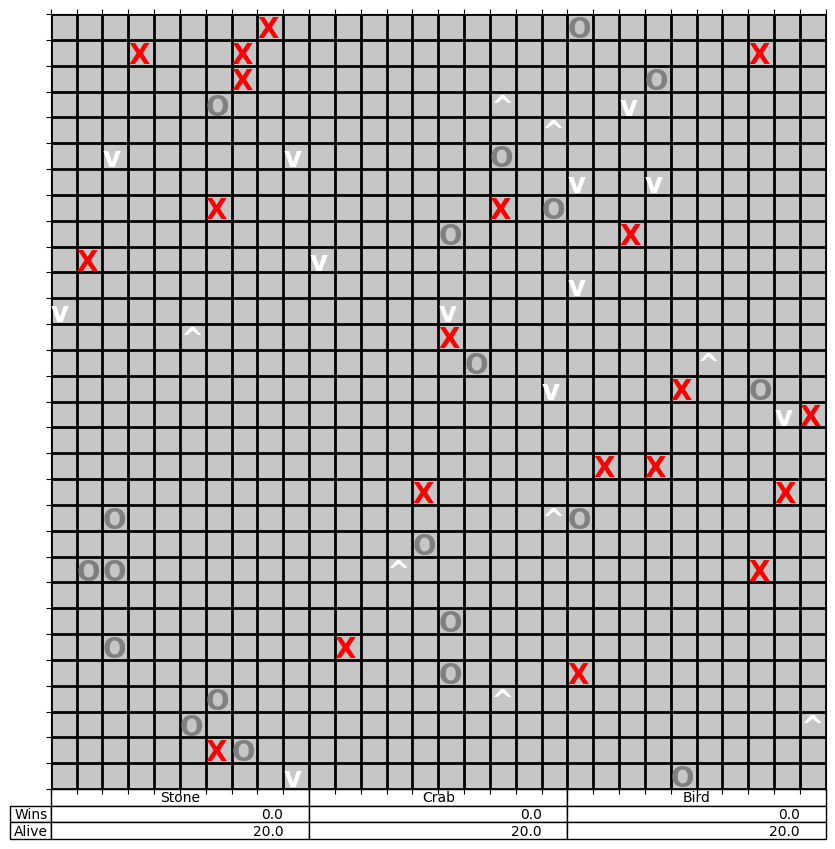

In [6]:
def observe():
  global board, Creatures, species, winCounts, alive, winCountsT, aliveT, names

  # plt.cla()
  display.clear_output(wait = True)

  N = len(board)
  background = -1*np.ones(np.shape(board))
  plt.matshow(background, cmap = plt.cm.Greys,vmin = -2, vmax = 1)
  ax = plt.gca()
  ax.set_xticks(np.arange(-.5, N, 1))
  ax.set_yticks(np.arange(-.5, N, 1))
  ax.set_xticklabels([])
  ax.set_yticklabels([])
  ax.grid(color='k', linestyle='-', linewidth=2)
  fig = plt.gcf()
  fig.set_figwidth(10)
  fig.set_figheight(10)

  for i in range(N):
    for j in range(N):
      if board[i,j]!=-1:
        index = int(board[i,j])
        app = Creatures[index].appearance()
        face = app[0]
        color = app[1]
        plt.text(j-0.5,i+0.4, face, color=color, fontsize = 20, fontweight= 'bold')

  fig2 = plt.figure(1)
  plt.table([winCounts, alive], rowLabels = ['Wins', 'Alive'], colLabels = names)

  plt.show()


initialize([])
observe()

In [7]:
def update(i,j):
  global board, Creatures, species, winCounts, alive

  #[i,j] differences from a central square
  #012
  #345
  #678
  directions = [[-1,-1],[-1,0],[-1,1],[0,-1],[0,0],[0,1],[1,-1],[1,0],[1,1]]

  N = len(board)

  # pull up the current agent from the index located at (i, j)
  index = int(board[i,j]) # Get the index of the agent located at (i, j)
  creature = Creatures[index] # Use the index to find the agent in the creature list

  #make the neighbors list to inform the creature of its surroundings
  #9 entries, corresponding to the 9 directions, holding empty lists or [face,color] appearances
  neighbors = []
  for diff in directions:
    # grab the coordinates of this neighbor
    ny = (i + diff[0])%N
    nx = (j + diff[1])%N
    if board[ny,nx]==-1: # If neighboring space is empty,
      neighbors.append([]) # represent the appearence of empty space as an empty list
    else: # If neighboring space is not empty,
      neigh_index = int(board[ny,nx]) # Get the index of the agent located at (ny, nx)
      neighbor = Creatures[neigh_index] # Use the index to find the agent in the creature list
      neighbors.append(neighbor.appearance()) # Put the appearence of the agent (face and color) in the neighbors list

  move = creature.move([i,j], neighbors) # Move function returns correct index of the directions list
  vec = directions[move] # Pull the given direction from the directions list
  ti = (i + vec[0])%N # Set the candidate next position (ti, tj) of the agent based on its movement function
  tj = (j + vec[1])%N

  #if we don't want to stay still
  if vec != [0,0]:
    #check the target square
    resident = int(board[ti, tj])

    #if there's nothing there
    if resident == -1:
      #move there
      board[ti, tj ] = index
      board[i, j ] = -1

    else: # If there is another agent occupying the spot we want to move to,
      target = Creatures[resident] # Find the agent in the creature list

      # The agents collide and play a life or death round of rock, paper, scissors
      tapp = target.appearance()
      capp = creature.appearance()
      attackerThrow = creature.fight(tapp[0],tapp[1]) # Calculate each agent's throw using their given strategies. Agents can only see the appearence of other agents.
      defenderThrow = target.fight(capp[0],capp[1])

      #has a problem if both throw non-allowed letters, favors the attacker
      matchup = [attackerThrow, defenderThrow]
      wins = [['R','S'],['S','P'],['P','R']] # A list of winning conditions for the attacker (current agent)
      losses = [['R','P'],['P','S'],['S','R']] # A list of losing conditions for the attacker
      win_loss_tie = 0 # -1 for a loss, 0 for a tie, 1 for a win
      if matchup in wins or defenderThrow not in ['R','P','S']: # If the attacker wins,
        # The attacker moves into the next position (erasing the opposing neighbor that was in the way)
        board[ti, tj ] = index
        board[i, j ] = -1
        speciesWins(creature.__class__.__name__) # increase the win count
        speciesLoses(target.__class__.__name__) #decrease the living count
        win_loss_tie = 1

      elif matchup in losses or attackerThrow not in ['R','P','S']: # If the attacker loses,
        # The attacker is erased from the board
        board[i, j ] = -1
        speciesWins(target.__class__.__name__)
        speciesLoses(creature.__class__.__name__)
        win_loss_tie = - 1
      #else: #with a tie, no change

      #tell each creature what happened, so the species can learn if it wants
      creature.record_outcome(target.appearance()[0],target.appearance()[1], attackerThrow, defenderThrow, win_loss_tie)
      target.record_outcome(creature.appearance()[0],creature.appearance()[1], defenderThrow, attackerThrow, -win_loss_tie)

    for s in range(len(species)):
      aliveT[s].append(alive[s])
      winCountsT[s].append(winCounts[s])


In [8]:
def speciesLoses(speciesName):
  global names, alive

  for s in range(len(names)):
    if names[s]==speciesName:
      alive[s]-=1

In [9]:
def speciesWins(speciesName):
  global names, winCounts


  for s in range(len(names)):
    if names[s]==speciesName:
      winCounts[s]+=1

Run the model!

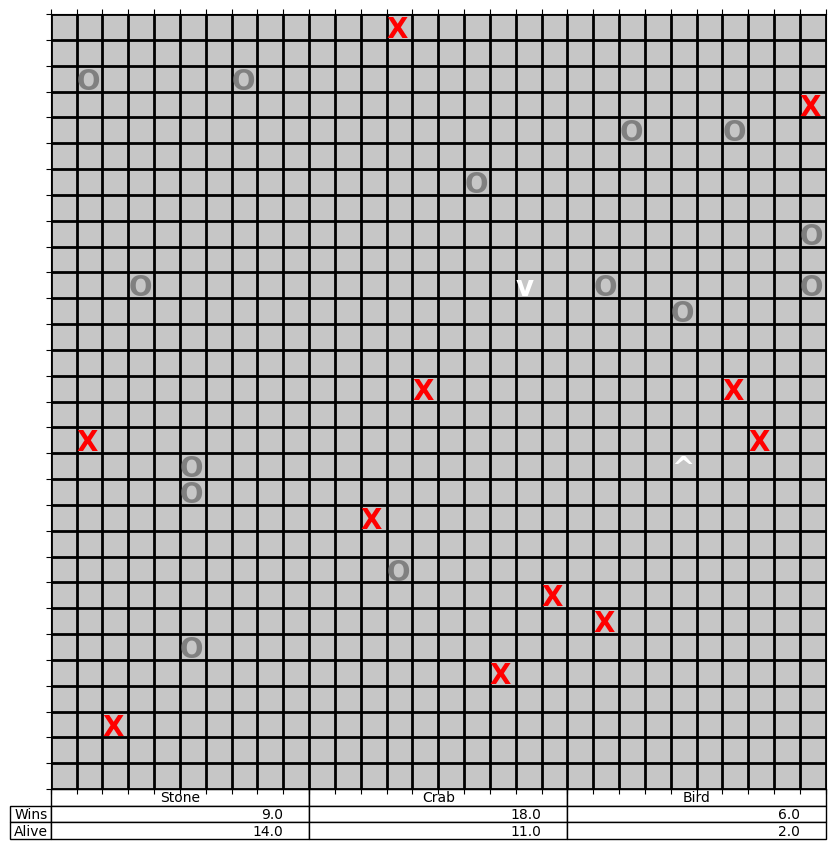

In [10]:
global board, Creatures, species, winCounts, names

#Master
initialize([])
observe()
T = 100
N = len(board)

for t in range(T):
  #gives [j i] list of coordinates where it's not -1 (grid spaces which are occupied by agents)
  occupied = np.argwhere(board!=-1)

  visitOrder = np.random.permutation(occupied) # Shuffle the order of agents so we can update randomly
  for cell_coords in visitOrder:
    y = int(cell_coords[0])
    x = int(cell_coords[1])
    update(y,x)

  observe()


### Problem 2: The Champion of the West (6 points)
In this problem, we'll create a fourth species. Because of our abundance of school spirit and pride, we will of course be creating the Michigan Wolverines (it's great to be one).

**"Wolverine" Species**

Species Wolverine will appear as an M that alternates maize (yellow) and blue. It will deliberately attack any agent in its neighborhood, and it will make a random throw (either rock, paper, or scissors). Note that Wolverines don't attack other Wolverines.

____

**The ```neighbors``` List**

In the ```move()``` function of every species, you can observe that an argument called ```neighbors``` is passed in. ```neighbors``` is a list that contains the *appearance* of every neighbor. Recall that a creature's appearance is represented in the form of a ```[shape/face, color]``` list. Note that empty spots in the neighborhood are represented by empty ```[]``` lists.

The list has been specifically ordered so that the index of the list is equal to the spot in the neighborhood (see *Naming Conventions* above). For example, ```neighbors[4]``` will give you the appearance of the current agent.

____

Deliberately attacking any agent in the neighborhood involves the following:

1.   Loop through the list of neighbor appearances and find the non-empty entries ```len(appearance_list) != 0```. If the appearance isn't empty, there must be a neighboring creature! Remember to add a condition that ignores the neighbor if it's another Wolverine ```neighbor_appearance[0] != 'M'```.
2.   Store the neighborhood location of every creature in the neighborhood using the ```neigh_creature_locations``` list. As explained above, a creature's ```neighbors``` list index will give you its neighborhood location.
3.  If we found neighboring creatures (```len(neigh_creature_locations) != 0```), we randomly choose one of them from the list and move to its location, which will initiate the attack.
4.  If there are no neighboring creatures, randomly choose a direction to move in. We don't include 4 in our choices here because Wolverines don't want to remain stationary.

>NOTE: You want to avoid considering the creature appearance at index 4, because that one cooresponds to the current agent. Failure to do this may result in your species never moving. A conditional which does this has been added for you below.

**2.A** (4 points) Using the instructions above, complete the wolverine class:

In [11]:
#goal: alternate blue and yellow, attack anything it sees, throw random RPS
class Wolverine:
  def __init__(self, index):
    self.index = index
    self.lastColor = np.random.choice(['blue', 'yellow'])

  def move(self, myPos, neighbors):
      neigh_creature_locations = [] # Stores the neighborhood locations of all the creatures in our neighborhood

      # Loop through the neighbors. Because the neighbors list is in order, index = neighborhood_location (from Naming Conventions)
      for neigh_location in range(len(neighbors)):
        if neigh_location != 4: # 4 is the center of the neighborhood (current agent's location), we want to ignore ourselves!
          current_neighbor_appearance = neighbors[neigh_location] # The neighbors list contains the appearances of the neighbors

          if len(current_neighbor_appearance) != 0: # <-- If the appearance of the current neighbor isn't empty (not an empty spot)
            if current_neighbor_appearance[0] != 'M': # <-- If the current neighbor doesn't look like a Wolverine (we don't want Wolverines to attack eachother)
              neigh_creature_locations.append(neigh_location) # Add this neighboring creature's index to the list

      if len(neigh_creature_locations) != 0: # If we have neighboring creatures
        target = np.random.choice(neigh_creature_locations) # <-- randomly choose one of the neighborhood locations that contains a neighboring creature
        return target # Move to the chosen creature's location to initiate attack

      else: # if there aren't neighboring creatures, move randomly but don't remain in place
        destination = np.random.choice([0, 1, 2, 3, 5, 6, 7, 8]) # All neighboring spots are possible except for 4 (so that we don't remain stationary)
        return destination

  def appearance(self):
    if self.lastColor == 'blue': # if the previous color was blue
      self.lastColor = 'yellow' # update last color to the current color (yellow)
      return ['M', 'yellow'] # return appearance with yellow

    else: # if the previous color was yellow
      self.lastColor = 'blue' # <-- update last color to the current color (blue)
      return ['M', 'blue'] # <-- return appearance with blue

  def fight(self, opp_face, opp_color):
    return np.random.choice(['R', 'P', 'S']) # <-- when attacking, the Wolverine throws rock, paper, or scissors with equal likelihood. Make sure to use the correct naming conventions! ('R', 'P', and 'S')

  # The Wolverine doesn't use record_outcome()
  def record_outcome(self, opp_face, opp_color, you_threw, opp_threw, win_loss_tie):
    return



**Running the Game with Custom Species**

In order to see how your custom species fare in the combat arena, you'll need to pass a list containing their names to the ```initialize()``` function. For example, if I wanted to test two species, ```Wolverine``` and ```ExampleSpecies```, I'd need to start the simulation by calling ```initialize([Wolverine, ExampleSpecies])```

____

**2.B** (2 points) Test the wolverines by running the model again with this new species included.
* How effective were the wolverines? Remember that survival rate and kill count are the metrics for success.
* In plain English, name one change that you could make to the wolverines' strategy to make them more effective.

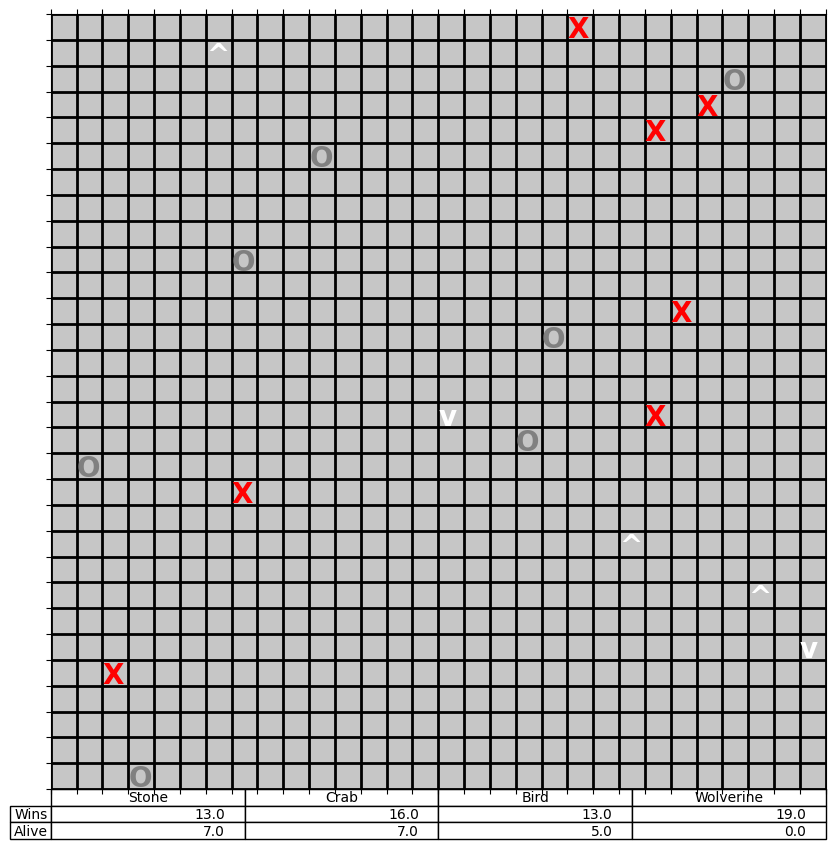

In [12]:
# global board, Creatures, species, winCounts, names
# Initialize with Wolverine added
initialize([Wolverine])
observe()
T = 100
N = len(board)

for t in range(T):
  occupied = np.argwhere(board!=-1)
  visitOrder = np.random.permutation(occupied)

  for cell_coords in visitOrder:
    y = int(cell_coords[0])
    x = int(cell_coords[1])
    update(y,x)

  observe()

***Double click*** and write down your response here!

The Wolverines are not very effective in general. After 100 timesteps, no wolverine is alive so the survival rate is really low compared to other species. There are 14 wolverines remain at the end. We observe that this number is still relatively low compared to the winning number of other species.  

We could improve the Wolverine class by enhancing their strategy. Instead of assigning them torandomly targeting opponents, we can make them make them move more favorably towards species that are more likely to defeat based on previous encounters. In other words, they can learn from their past experiences to better implement their targeting strategy.

### Problem 3: Create Your Own Champion (36 points)
Now that you've had some practice with creating species, it's time to cut you loose to design your own.

____

**The ```record__outcome()``` Function**

The ```record__outcome()``` function takes a record of the outcome of every fight that your species engages in. You'll get information about the fight like the face and color of the opponent, the throws of both creatures, and whether this fight resulted in a win (```win_loss_tie = 1```), loss (```win_loss_tie = -1```), or a tie (```win_loss_tie = 0```).

The model automatically passes this information into the ```record_outcome()``` function in the form of 5 arguments: ```opp_face```, ```opp_color```, ```you_threw```, ```opp_threw```, and ```win_loss_tie```.

The default species don't utilize ```record_outcome()``` at all, but there are many creative uses for it. For example, you could use this function to maintain information about an overall win rate, or even keep track of win rates against specific opposing species.

It's possible to harness this information to create a species that makes strategy adjustments based on how well it's doing. Give it a try!

____

**Note on Constraints**

It's against the rules to create species that can:

*   See further than what's in their immediate neighborhood
*   Move more than one space (sideways or diagonal) in a single update
*   Access information about opposing creatures, other than their appearance
*   Break the simulation, or cause it to run in an infinite loop

If your species does any of the above, it will immediately be disqualified.

**3.A** (25 points) Using the barebones template below, design your own species. Your species can be as simple or complex as you want, but it needs to follow the above constraints.

In [13]:
class Adapter: # <-- NAME YOUR SPECIES
  def __init__(self, index):
    self.index = index
    # Set up a dictionary at the beginning to record how many times opponents make each throw
    self.throw_counts = {'R': 0, 'P': 0, 'S': 0}
    # Set up an random initial color for appearance
    self.lastColor = np.random.choice(['red', 'green', 'blue'])

  def move(self, myPos, neighbors):
    # Initialize an empty list for storing target spaces
    targets = []
    # Iterate over the neighbors and their corresponding indices
    for idx, neighbor in enumerate(neighbors):
      # Check if the neighbor is not empty and not copied by another adaptor
      if neighbor and neighbor[0] != 'A':
        # If condition met, we add the indices to target spaces list
        targets.append(idx)
    # Choose the random target from targets list if there is any, otherwise we will choose randomly from neighbors
    chosen_target = np.random.choice(targets) if targets else np.random.choice(range(len(neighbors)))
    return chosen_target

  def appearance(self):
    # Check if the last color is green
    if self.lastColor == 'green':
      # If it is, return to red
      self.lastColor = 'red'
    else:
      # If it is not red, return to green
      self.lastColor = 'green'
    # Set the appearance and return to it
    appearance = ['A', self.lastColor]
    return appearance

  def fight(self, opp_face, opp_color):
    # Initialize the most_common_throw variable
    most_common_throw = None
    # Check if there are any throws in throw_counts
    if all(count == 0 for count in self.throw_counts.values()):
      # If there are no throws, we choose it randomly between 'R', 'P', 'S'
      throw_choice = np.random.choice(['R', 'P', 'S'])
    else:
      # Else find the most common throw

      most_common_throw = max(self.throw_counts, key=self.throw_counts.get)

    # Based on the most common throw from opponents, decide what to throw
    if most_common_throw == 'R':
      # If the most common throw is 'R', choose 'P' because Paper covers Rock
      throw_choice = 'P'
    elif most_common_throw == 'P':
      # If the most common throw is 'P', choose 'S' because Scissors cut Paper
      throw_choice = 'S'
    elif most_common_throw == 'S':
       # If the most common throw is 'S', choose 'R' because Rock crushes Scissors
      throw_choice = 'R'

    # return the chosen throw
    return throw_choice

  def record_outcome(self, opp_face, opp_color, you_threw, opp_threw, win_loss_tie):
    # Increment the opponent's throw count to the throw_history dictionary
    self.throw_counts[opp_threw] += 1

**3.B** (4 points) Add comments to your code above that thoroughly explain what it does and how it works. Your comments should be interspersed within the code, and should provide a step-by-step technical explanation within each class function.

**3.C** (5 points) Now, use the text block below to make an informal introduction to your species! Answer the following:


*   What is your species' name and why?
*   What does your species look like? Does its appearance ever change?
*   How does your species move around? Do its rules for movement ever change?
*   What is your species' strategy in rock, paper, scissors? Is the strategy adaptive or fixed?
*   (optional) Write a sports chant that fans of your species can bellow to intimidate opponents



***Double click*** and write down your response here!

My species' name is Adaptor. I use this name because this species adapts and improve its strategy to counter its opponents over time.

The Adaptor appears as an 'A' and alternates between red and green, representing its readiness for battle and its adaptive nature. The color changes each turn, showing a signal to others that the Adaptor is always shifting and evolving.  

My species moves around by seeking out neighbors that are not Adaptors themselves. If there is no valid target nearby, it will move randomly. By learning which enemy species are weaker, the Adaptor can specifically choose the random target from targets list. It tends to move towards the weaker opponents while avoiding conflicts with the stronger ones. The rules for movement does not change over time.

The Adaptor starts with a random choice. It then keeps track of what throws opponents have made in the past and adapts its throw each run to counter the most frequent (most_common_throw) by the opponent in rock, paper, and scissors. The record_outcome function allows the species to learn and adapt its strategy over time based on the outcomes of its encounters. It is adaptive as it updates the opponent's throw count and adapts it accordingly at each timestep.

**3.D** (2 points) Run your species through the simulation with the default species and wolverines. Post a screenshot below.

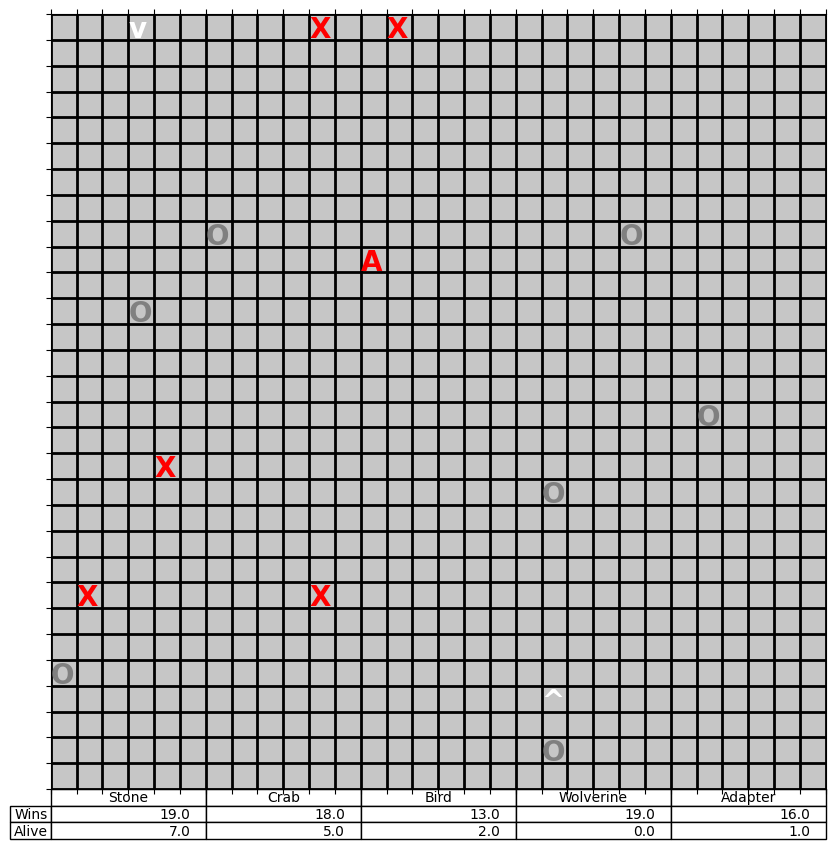

In [14]:
initialize([Wolverine, Adapter])
observe()
T = 100
N = len(board)

for t in range(T):
  occupied = np.argwhere(board!=-1)
  visitOrder = np.random.permutation(occupied)

  for cell_coords in visitOrder:
    y = int(cell_coords[0])
    x = int(cell_coords[1])
    update(y,x)

  observe()

***Double click*** and post your screenshot here!
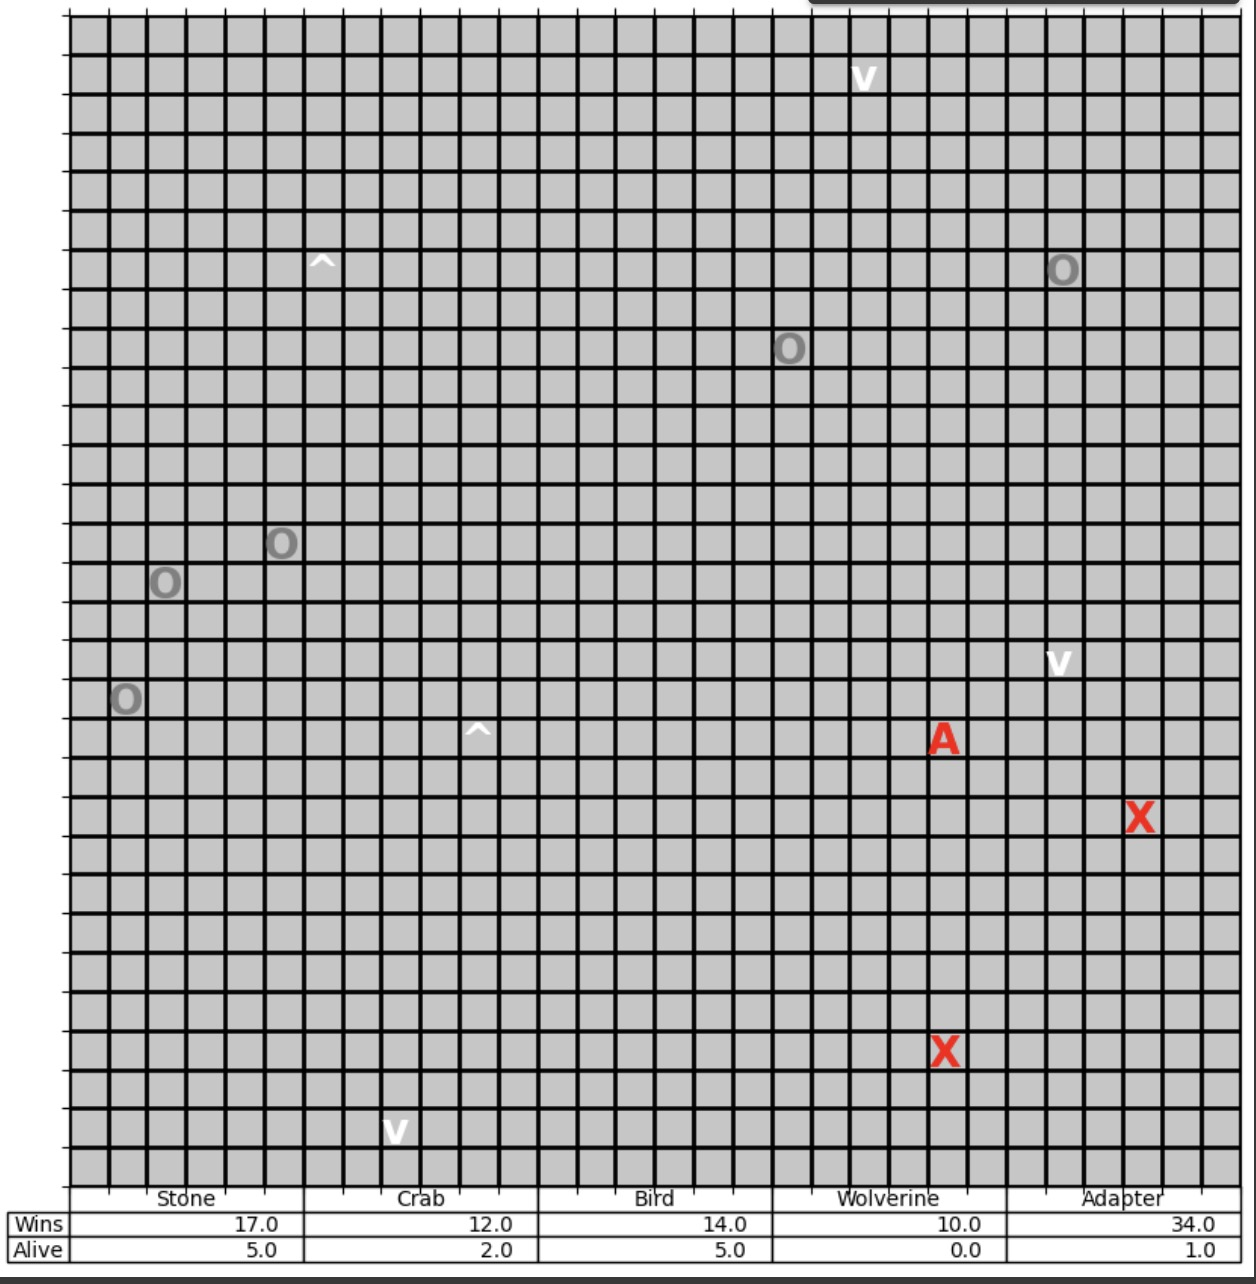